In [1]:
import pandas as pd 
data = pd.read_csv("数据\基于用户行为的贷款预测训练集.csv")

In [2]:
def feature_change(feature):
    list_data = data[feature].value_counts()
    for i in list_data.index:
        data.loc[data[feature] == i, feature] = list_data.index.get_loc(i)
feature_change('Married/Single')
feature_change('House_Ownership')
feature_change('Car_Ownership')
feature_change('Profession')
feature_change('CITY')
feature_change('STATE')
data['Married/Single']=data['Married/Single'].astype('Int32')
data['House_Ownership']=data['House_Ownership'].astype('Int32')
data['Car_Ownership']=data['Car_Ownership'].astype('Int32')
data['Profession']=data['Profession'].astype('Int32')
data['CITY']=data['CITY'].astype('Int32')
data['STATE']=data['STATE'].astype('Int32')

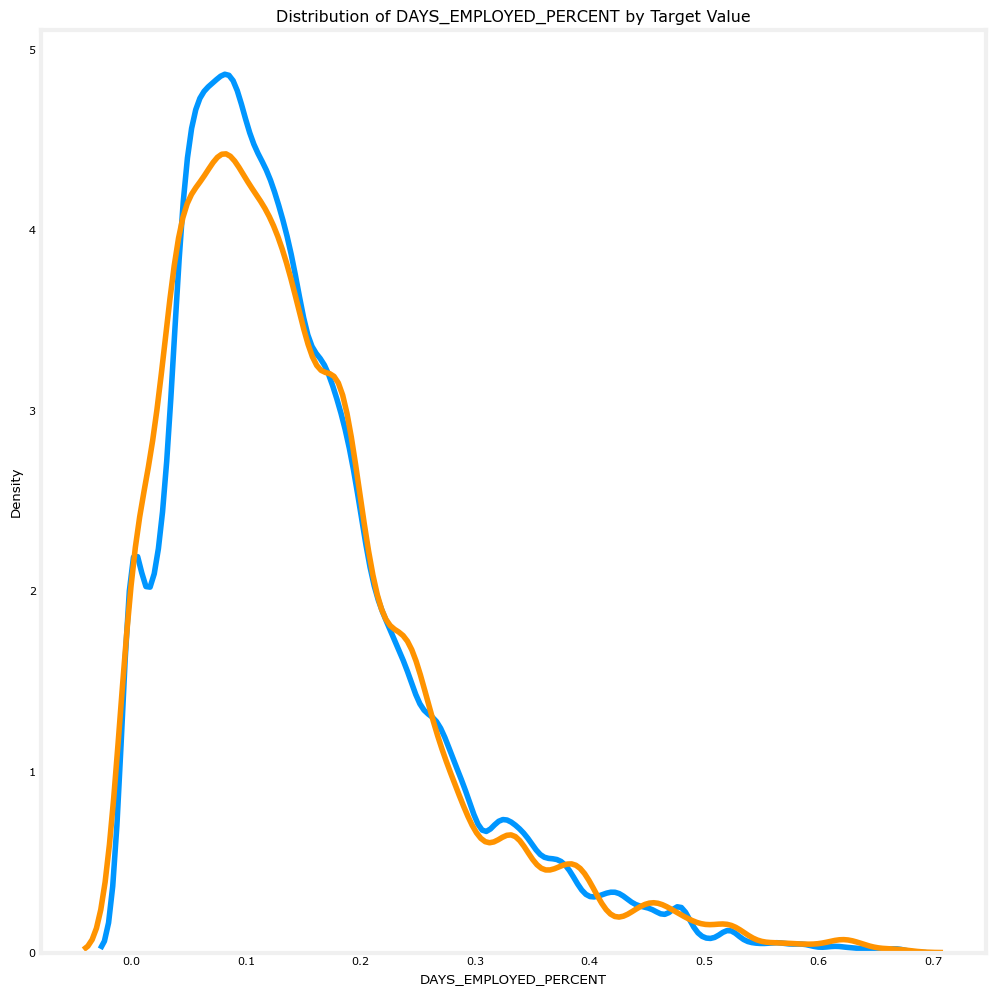

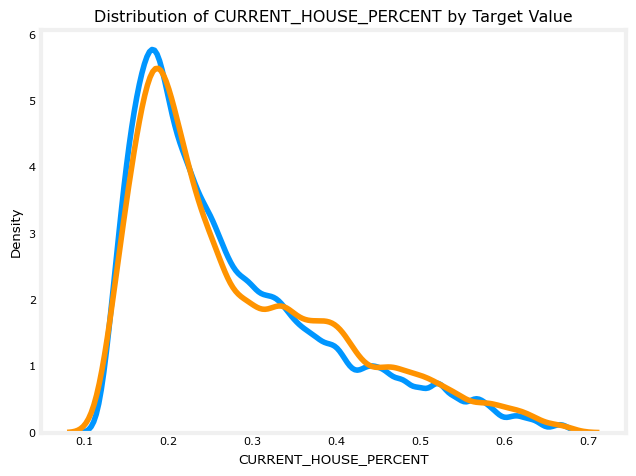

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('./deeplearning.mplstyle')
#构造新特征

#构建新特征
data['DAYS_EMPLOYED_PERCENT'] = data['CURRENT_JOB_YRS'] / data['Age']#用户工作时间/年龄
data['CURRENT_HOUSE_PERCENT'] = data['CURRENT_HOUSE_YRS'] / data['Age']#用户居住时间/年龄
plt.figure(figsize=(10, 10))
# 构造新特性的迭代器
def plot_feature_distribution(feature):
    for i, feature in enumerate([feature]):
        # 创建子图
        plt.subplot(1, 1, i + 1)
        # 按期还款用户的KDE图
        sns.kdeplot(data.loc[data['Risk_Flag'] == 0, feature], label='Risk_Flag == 0')
        # plot loans that were not repaid
        sns.kdeplot(data.loc[data['Risk_Flag'] == 1, feature], label='Risk_Flag == 1')
        # 未按期还款用户的KDE图
        plt.title('Distribution of %s by Target Value' % feature)
        plt.xlabel('%s' % feature);
        plt.ylabel('Density');
    plt.tight_layout(h_pad=2.5)
    plt.show()
plot_feature_distribution('DAYS_EMPLOYED_PERCENT')
plot_feature_distribution('CURRENT_HOUSE_PERCENT')


In [4]:
data['Income'] = pd.cut(data['Income'],bins=100,labels=range(100))
data['Age'] = pd.cut(data['Age'],bins=12,labels=range(12))
data['Income'] = data['Income'].astype('Int32')
data['Age'] = data['Age'].astype('Int32')

d:\softwore\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30382 (\N{CJK UNIFIED IDEOGRAPH-76AE}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)
d:\softwore\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23572 (\N{CJK UNIFIED IDEOGRAPH-5C14}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)
d:\softwore\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36874 (\N{CJK UNIFIED IDEOGRAPH-900A}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)
d:\softwore\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)
d:\softwore\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)
d:\softwor

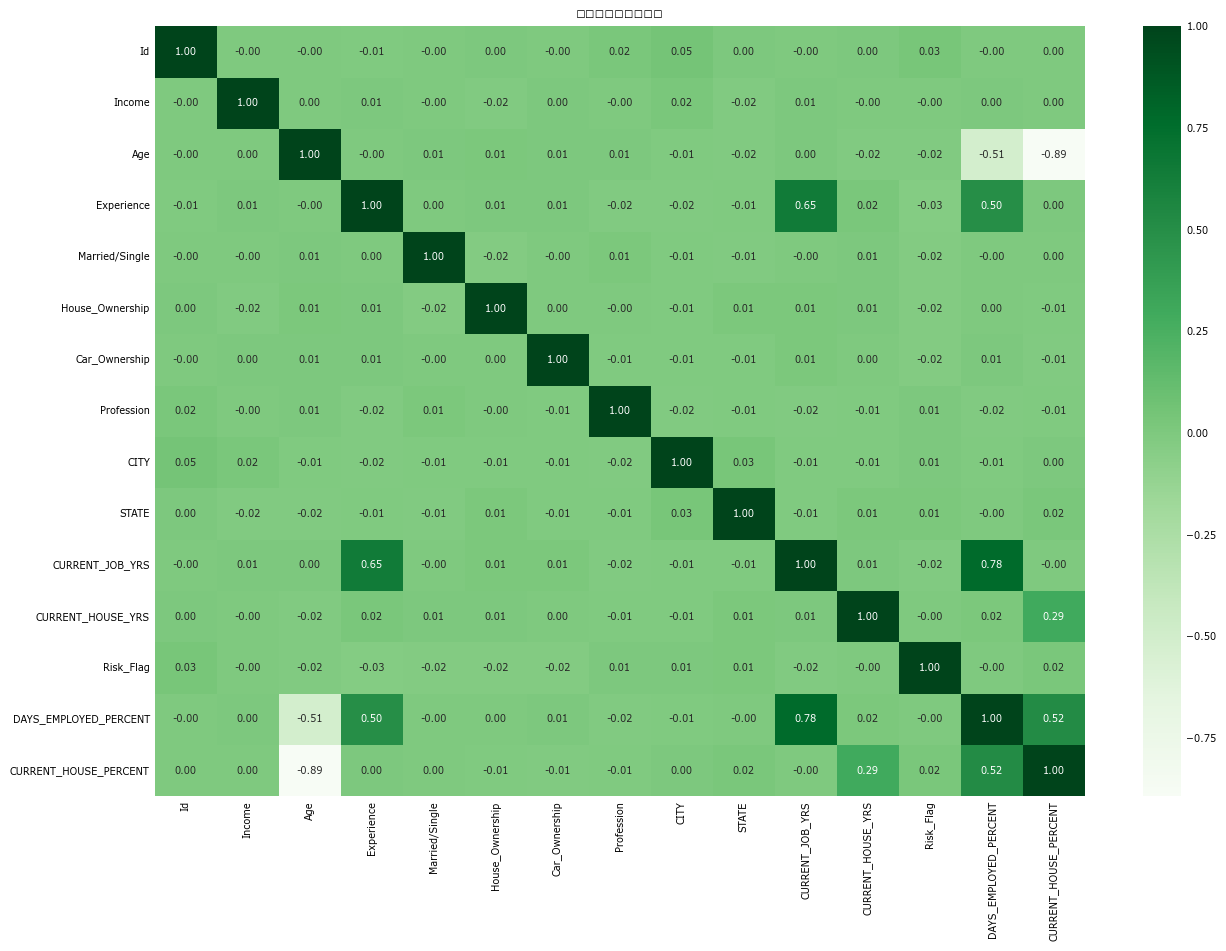

3065

In [5]:
import numpy as np
import gc
df_normalized_data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# print(df_normalized_data)

# 利用皮尔逊相关系数查看多重共线性 及 可视化
df_corr = df_normalized_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data=df_corr, annot=True, fmt='.2f', annot_kws={'size': 7}, cmap='Greens')  # 若不喜欢绿色，可以通过cmap更改颜色
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=7)
plt.title('皮尔逊相关系数矩阵', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()
del df_normalized_data,df_corr
gc.collect()

In [6]:
data.drop(columns=['Age','CURRENT_JOB_YRS'],inplace=True)

In [7]:
#2. xgboost模型
# 定量特征转化为标准正态分布
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
data[["Income","Experience","CURRENT_HOUSE_YRS"]] = StandardScaler().fit_transform(data[["Income","Experience","CURRENT_HOUSE_YRS"]])

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X = data[
            ["Income","Experience", "Married/Single", "House_Ownership", "Car_Ownership","Profession","CITY","STATE",
             "CURRENT_HOUSE_YRS", "DAYS_EMPLOYED_PERCENT", "CURRENT_HOUSE_PERCENT"]]
y = data[["Risk_Flag"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

        

---------------------xgboost forest---------------------
[0]	validation_0-logloss:0.37966
[1]	validation_0-logloss:0.37223
[2]	validation_0-logloss:0.36564
[3]	validation_0-logloss:0.36058
[4]	validation_0-logloss:0.35559
[5]	validation_0-logloss:0.34954
[6]	validation_0-logloss:0.34426
[7]	validation_0-logloss:0.34090
[8]	validation_0-logloss:0.33582
[9]	validation_0-logloss:0.33157
[10]	validation_0-logloss:0.32790
[11]	validation_0-logloss:0.32444
[12]	validation_0-logloss:0.32115
[13]	validation_0-logloss:0.31822
[14]	validation_0-logloss:0.31613
[15]	validation_0-logloss:0.31409
[16]	validation_0-logloss:0.31012
[17]	validation_0-logloss:0.30807
[18]	validation_0-logloss:0.30589
[19]	validation_0-logloss:0.30305
[20]	validation_0-logloss:0.30010
[21]	validation_0-logloss:0.29847
[22]	validation_0-logloss:0.29689
[23]	validation_0-logloss:0.29457
[24]	validation_0-logloss:0.29205
[25]	validation_0-logloss:0.28894
[26]	validation_0-logloss:0.28722
[27]	validation_0-logloss:0.28614
[

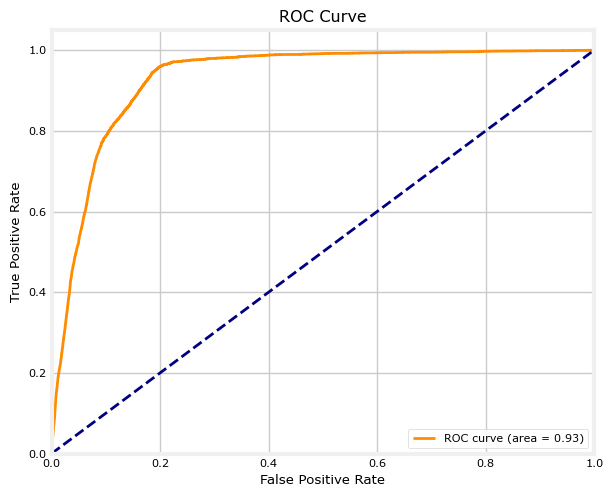

5989

In [8]:
# xgboost模型训练
from xgboost import XGBClassifier 
print("---------------------xgboost forest---------------------")
xgbc = XGBClassifier(
    objective='binary:logistic',
    max_depth=10,
    n_estimators=1000,
    learning_rate=0.1,
    nthread=4,
    subsample=0.7,
    colsample_bytree=0.7,
    min_child_weight=3,
    n_jobs=-1
)
xgbc.fit(X_train, y_train,eval_set=[(X_test, y_test)])
print("训练集精度:")
result = xgbc.score(X_train,y_train)
print(result)
print("验证集精度:")
result = xgbc.score(X_test,y_test)
print(result)
# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
y_score = xgbc.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test, y_score[:,1]);
roc_auc = auc(fpr, tpr)
# 确定最佳阈值
right_index = (tpr + (1 - fpr) - 1)
yuzhi = max(right_index)
index = list(right_index).index(max(right_index))
tpr_val = tpr[index]
fpr_val = fpr[index]
# 绘制roc曲线图
plt.subplots(figsize=(7,5.5))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show() 
del fpr,tpr,right_index,tpr_val,fpr_val,thresholds,y_score,roc_auc
gc.collect()

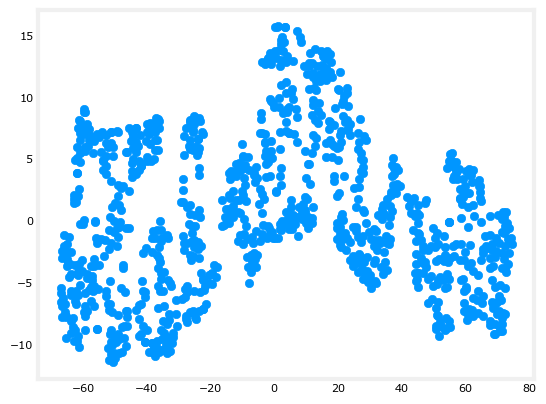

3096

In [9]:
# t-SNE降维可视化
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:1000])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()
del X_tsne
gc.collect()

神经网络

In [10]:
import logging
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense# type: ignore
from tensorflow.keras.activations import relu,sigmoid# type: ignore
from tensorflow.keras.optimizers import Adam# type: ignore
from tensorflow.keras.losses import BinaryCrossentropy# type: ignore
from tensorflow.keras.metrics import binary_accuracy# type: ignore
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(42)
model = Sequential(
    [
        Dense(10, activation='relu'),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid'),

    ], name="Complex"
)
model.compile(
    loss=BinaryCrossentropy(),
    metrics=[binary_accuracy],
    optimizer=Adam(0.01),
)

In [11]:

model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=100,
)

Epoch 1/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 3s 674us/step - binary_accuracy: 0.8643 - loss: 0.4191
Epoch 2/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - binary_accuracy: 0.8771 - loss: 0.3722
Epoch 3/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - binary_accuracy: 0.8771 - loss: 0.3720
Epoch 4/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - binary_accuracy: 0.8771 - loss: 0.3721
Epoch 5/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - binary_accuracy: 0.8771 - loss: 0.3722
Epoch 6/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - binary_accuracy: 0.8771 - loss: 0.3723
Epoch 7/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - binary_accuracy: 0.8771 - loss: 0.3720
Epoch 8/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - binary_accuracy: 0.8771 - loss: 0.3719
Epoch 9/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - binary_accuracy: 0.8772 - loss: 0.3718
Epoch 10/10
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - binary_accuracy: 0.8771 - loss: 0.3716


In [12]:
from sklearn.metrics import roc_auc_score
y_score = model.predict(X_test)

roc_auc_score(y_test, model.predict(X_test))


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step


0.5245447410513076

Training Data Shape:  (201600, 10)
Testing Data Shape:  (50400, 10)
[LightGBM] [Info] Number of positive: 19867, number of negative: 141413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 161280, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19939, number of negative: 141341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in t

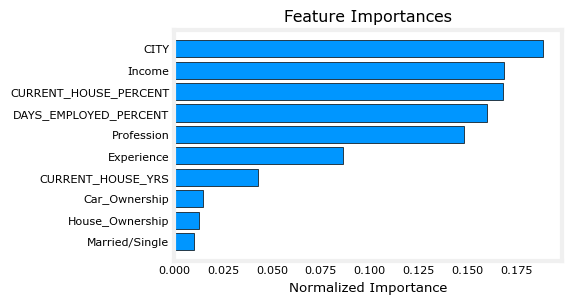

In [13]:
#建模
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc
from sklearn.model_selection import train_test_split # type: ignore
#1. LGBMClassifier模型
train_data,test_data = train_test_split(data, train_size=0.80, shuffle=True, random_state=1)
def model(features, test_features, n_folds=5):
    # 提取id
    test_ids = test_features['Id']
    # 提起训练集中的id
    labels = features['Risk_Flag']
    test_labels = test_features['Risk_Flag']
    # 删除训练集中的id和target
    features = features.drop(columns=['Id', 'Risk_Flag','STATE'])
    test_features = test_features.drop(columns=['Id','STATE', 'Risk_Flag'])
    cat_indices = 'auto'
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)

    # 提取训练集特征的名字
    feature_names = list(features.columns)
    # 转换为np数组
    features = np.array(features)
    labels = np.array(labels)
    test_features = np.array(test_features)
    test_labels = np.array(test_labels)
    # 创建K者交叉验证对象
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)
    # 为重要特征设置空数组
    feature_importance_values = np.zeros(len(feature_names))
    # 创建测试预测的空数组
    test_predictions = np.zeros(test_features.shape[0])
    # 创建空数组，为了折叠验证预测
    out_of_fold = np.zeros(features.shape[0])
    # 创建list，保存验证和训练分数
    valid_scores = []
    train_scores = []
    # 创建K折验证迭代器
    for train_indices, valid_indices in k_fold.split(features):
        # K折训练数据
        train_features, train_labels = features[train_indices], labels[train_indices]
        # K折验证数据
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
   
# 创建LGBMClassifier模型
        model = lgb.LGBMClassifier(n_estimators=1000, objective='binary',
                                   class_weight='balanced', learning_rate=0.05,
                                   reg_alpha=0.1, reg_lambda=0.1,
                                   subsample=0.8, n_jobs=-1, random_state=50)
        # 训练模型
        model.fit(train_features, train_labels, eval_metric='auc',
                  eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names=['valid', 'train'], categorical_feature=cat_indices)
        # 在训练过程中使用了提前停止，使用best_iteration从最佳迭代中获取训练结果
        best_iteration = model.best_iteration_
        # 记录重要特征
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        # 预测
        test_predictions += model.predict_proba(test_features, num_iteration=best_iteration)[:, 1] / k_fold.n_splits
        # 在验证集上预测
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]
        # 记录最好的分数
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        # 清楚所有变量
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
    # 设置提交文件的数据框格式
    submission = pd.DataFrame({'Risk_Flag': test_predictions,'True_Risk_Flag':test_labels})

    
    # 把重要特性变成数据框格式
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    # 整体验证评分
    valid_auc = roc_auc_score(labels, out_of_fold)
    # 将总分添加到指标中
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    # 创建验证分数的数据框格式
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    # 验证分数的数据框格式
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})
    return submission, feature_importances, metrics
 
#利用自定义函数训练模型，并输出5折交叉验证的结果
submission, fi, metrics = model(train_data, test_data)
print('Baseline metrics')
print(metrics)


del train_data,test_data
gc.collect
 
def plot_feature_importances(df):
    # 根据重要性对特征进行排序
    df = df.sort_values('importance', ascending=False).reset_index()
    # 将特性的重要性标准化，使其加起来等于1
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    # 做一个特征重要性的水平条形图
    plt.figure(figsize=(5, 3))
    ax = plt.subplot()
    # 最重要的特征放在最上面
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align='center', edgecolor='k')
    # 设置y轴标签和刻度
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    # 设置x轴标签、标题
    plt.xlabel('Normalized Importance');
    plt.title('Feature Importances')
    plt.show()
    return df
fi_sorted = plot_feature_importances(fi)
 


In [14]:
# 查看auc分数
print(roc_auc_score(submission['True_Risk_Flag'],submission['Risk_Flag']))
del fi,metrics,fi_sorted
gc.collect()

0.9093586850651455


3638

集成学习

In [15]:
import pandas as pd
import numpy as np
import gc
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
lg_params = {
    'n_estimators': 1000,
    'objective': 'binary',
    'class_weight': 'balanced',
    'learning_rate': 0.05,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'subsample': 0.8,
    'n_jobs': -1,
    'random_state': 50,
    'log_level': 'WARNING'
}

xgb_params = {
    'objective': 'binary:logistic',
    'max_depth': 10,
    'n_estimators': 1000,
    'learning_rate': 0.1,
    'nthread': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'n_jobs':-1
}

cat_params = {'learning_rate': 0.1,
              'depth': 9,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 11,
              'allow_writing_files': False
              }

lg = lgb.LGBMClassifier(**lg_params)
xgb = XGBClassifier(**xgb_params)
cat = CatBoostClassifier(**cat_params)
def get_oof(feats, target, test, kfold, clf):
  oof_preds = np.zeros(feats.shape[0])
  sub_preds = np.zeros(test.shape[0])
  feats = np.array(feats)
  target = np.array(target)
  for i, (train_idx, valid_idx) in enumerate(kfold.split(feats)):
    train_X, train_y = feats[train_idx], target[train_idx]
    valid_X, valid_y = feats[valid_idx], target[valid_idx]
    if clf == lg:
        clf.fit(train_X, train_y,eval_metric='auc',eval_set = [(valid_X, valid_y)])
    elif clf == xgb:
        clf.fit(train_X, train_y, eval_set = [(valid_X, valid_y)])
    else:
        clf.fit(train_X, train_y, eval_set = [(valid_X, valid_y)], verbose = 5000, early_stopping_rounds = 50)
    oof_preds[valid_idx] = clf.predict_proba(valid_X)[:,1]
    sub_preds += clf.predict_proba(test)[:,1]
    del train_X, train_y, valid_X, valid_y
    gc.collect()

  evalution_result = roc_auc_score(target, oof_preds)
  print('*'*10)
  print('roc auc score:', evalution_result)
  print('*'*20)
  sub_preds_result = sub_preds / kfold.n_splits
  return oof_preds ,sub_preds_result

kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
oof_preds_1, sub_preds_1 = get_oof(X_train, y_train, X_test, kfold, lg)
oof_preds_2, sub_preds_2 = get_oof(X_train, y_train, X_test, kfold, xgb)
oof_preds_3, sub_preds_3 = get_oof(X_train, y_train, X_test, kfold, cat)

from sklearn.linear_model import RidgeClassifier

def stack_model(train_stack, test_stack, y):

    oof = np.zeros((train_stack.shape[0],))
    predictions = np.zeros((test_stack.shape[0],))
    scores = []
    y = np.array(y)
    for fold_, (trn_idx, val_idx) in enumerate(kfold.split(train_stack, y)):
        trn_data, trn_y = train_stack[trn_idx], y[trn_idx]
        val_data, val_y = train_stack[val_idx], y[val_idx]

        clf = RidgeClassifier(random_state=0)
        clf.fit(trn_data, trn_y)

        oof[val_idx] = clf._predict_proba_lr(val_data)[:,1]
        predictions +=clf._predict_proba_lr(test_stack)[:,1] / kfold.n_splits

        score_single = roc_auc_score(val_y, oof[val_idx])
        scores.append(score_single)
    print('mean: ', np.mean(scores))

    return oof, predictions

pred_matrix = np.hstack([sub_preds_1[:,np.newaxis], sub_preds_2[:,np.newaxis], sub_preds_3[:,np.newaxis]])
oof_matrix = np.hstack([oof_preds_1[:,np.newaxis], oof_preds_2[:,np.newaxis], oof_preds_3[:,np.newaxis]])

oof_stack, predictions_stack = stack_model(oof_matrix, pred_matrix, y_train)
result = pd.DataFrame({'id':X_test.index, 'target': predictions_stack})

[LightGBM] [Warning] Unknown parameter: log_level


d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] Number of positive: 19815, number of negative: 141465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 161280, number of used features: 11
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level


d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] Number of positive: 19779, number of negative: 141501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 161280, number of used features: 11
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level


d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] Number of positive: 19855, number of negative: 141425
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 161280, number of used features: 11
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level


d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] Number of positive: 19742, number of negative: 141538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 161280, number of used features: 11
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level


d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] Number of positive: 19781, number of negative: 141499
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 161280, number of used features: 11
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Unknown parameter: log_level
[LightGBM] [Warning] Unknown parameter: log_level
**********
roc auc score: 0.903745475128074
********************
[0]	validation_0-logloss:0.37709
[1]	validation_0-logloss:0.37047
[2]	validation_0-logloss:0.36449
[3]	validation_0-logloss:0.35

d:\softwore\conda\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\softwore\conda\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

mean:  0.9222889874905921


d:\softwore\conda\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
print('roc auc score:', roc_auc_score(y_test,result['target']))

roc auc score: 0.9265500452052027
